## Business Understanding

Salah satu bank terkemuka ingin memprediksi nasabah yang terindikasi kredit macet saat mengajukan pinjaman. Pemberi pinjaman biasanya membuat dua jenis putusan:

1. pertama, apakah akan memberikan kredit pada pemohon baru, dan
2. kedua bagaimana menangani pemohon yang sudah ada, termasuk apakah akan meningkatkan batas kredit mereka.

Dalamkedua kasus apapun teknik yang digunakan, sangat penting bahwa ada sampel besar pelanggan sebelumnya dengan detail aplikasi,pola perilaku, dan riwayat kredit berikutnya yang tersedia. Sebagian besar teknik menggunakan sampel ini untuk mengidentifikasi hubungan antara karakteristik konsumen (pendapatan tahunan, usia, jumlah tahun bekerja dan pemberi kerja saat ini, dll). Dan riwayat mereka selanjutnya,area aplikasi khas di pasar konsumen meliputi: kartu kredit, pinjaman mobil, hipotek rumah, pinjaman ekuitas rumah, pesanan katalog surat,dan berbagai macam pinjaman pribadi.

Objectives 1: Predictive pengajuan nasabah kartu kredit yang baru akan gagal bayar atau tidak.
## Predictive analytic untuk menganalisir angka resiko nasabah bary=u yang berpotensi gagal bayar pada pengajuan kartu kredit menggunakan pendekatan saince data

Case: Klasifikasi --> Supervised Learing

Kemungkinan menggunakan Algoritma:
1. Decision Tree
2. Random Forest
3. Logistic Regresssion
4. SVM (Suport Vector Machine)
5. XGBOOST Classifier

Objectives 2: Predictives kenaikan angka kredit pada nasabah yang sudah ada
## Predictive analytic untuk optimalisasi nilai kredit OLD nasabah pada bank XX

Case: Estimasi

Kemungkinan Algoritma yang digunakan:
1. Linear Regression
2. ANN (Artificial Neural Network)

In [ ]:
# Library

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


## Data Understanding

In [ ]:
# Load Data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path='/content/drive/MyDrive/DataSource/credit_risk_1.csv'

load_data_cr=pd.read_csv(path)
load_data_cr

,Unnamed: 0,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,4,24,2,2,0,28,17.3,1.787436,3.056564,1.0
...,...,...,...,...,...,...,...,...,...,...
695,695,36,2,6,15,27,4.6,0.262062,0.979938,1.0
696,696,29,2,6,4,21,11.5,0.369495,2.045505,0.0
697,697,33,1,15,3,32,7.6,0.491264,1.940736,0.0
698,698,45,1,19,22,77,8.4,2.302608,4.165392,0.0


In [ ]:
## Membuat data Frame

df=pd.DataFrame(load_data_cr)
df.head()

,Unnamed: 0,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,4,24,2,2,0,28,17.3,1.787436,3.056564,1.0


Data Description There are 9 attribute containing 700 customer records followed by:

age: Umur nasabah

ed: level pendidikan nasabah

employ: Masa jabatan dengan pemberi kerja saat ini (dalam tahun)

address: Jumlah tahun di alamat yang sama

income: Pendapatan nasabah

debtinc: Debt to income ratio (Rasio hutang terhadap pendapatan) Rasio hutang terhadap pendapatan adalah semua pembayaran hutang bulanan anda dibagi dengan pendapatan kotor bulanan anda. Angka ini adalah salah satu cara pemberi pinjaman mengukur kemampuan anda untuk mengelola pembayaran bulanan untuk melunasi uang yang anda rencanakan untuk dipinjam. Ratio hutang terhadap pendapatan anda secara langsung mempengaruhi nilai kredit anda . ini karena lembaga kredit tidak tahu berapa banyak uang yang anda peroleh, sehingga mereka tidak dapat melakukan perhitungan

creddebt: Credit to debt Ratio (Rasio kredit terhadap hutang)menunjukkan bahwa presentase rasio hutang terhadap kredit yang baik dibawah 30%. Dan itu berlaku untuk rasio anda pada salah satu  kartu anda secara terpisah serta untuk rasio keseluruhan anda.

othdebt : Utang lainnya

default : Label nasabah gagal di masa lalu (1 = gagal , 0 = tidak pernah gagal)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  700 non-null    int64  
 1   age         700 non-null    int64  
 2   ed          700 non-null    int64  
 3   employ      700 non-null    int64  
 4   address     700 non-null    int64  
 5   income      700 non-null    int64  
 6   debtinc     700 non-null    float64
 7   creddebt    700 non-null    float64
 8   othdebt     700 non-null    float64
 9   default     700 non-null    float64
dtypes: float64(4), int64(6)
memory usage: 54.8 KB


In [ ]:
df.isnull().sum()

Unnamed: 0    0
age           0
ed            0
employ        0
address       0
income        0
debtinc       0
creddebt      0
othdebt       0
default       0
dtype: int64

In [ ]:
#Melakukan cek value jumlah default berdasarkan gagal atau tidak (1 atau 0)

df['default'].value_counts()

0.0    517
1.0    183
Name: default, dtype: int64

In [ ]:
df['ed'].value_counts()

1    372
2    198
3     87
4     38
5      5
Name: ed, dtype: int64

In [ ]:
df_data_cr=pd.DataFrame(load_data_cr)

In [ ]:
df=df_data_cr[['age','ed','employ','address','income','debtinc','creddebt','othdebt','default']]

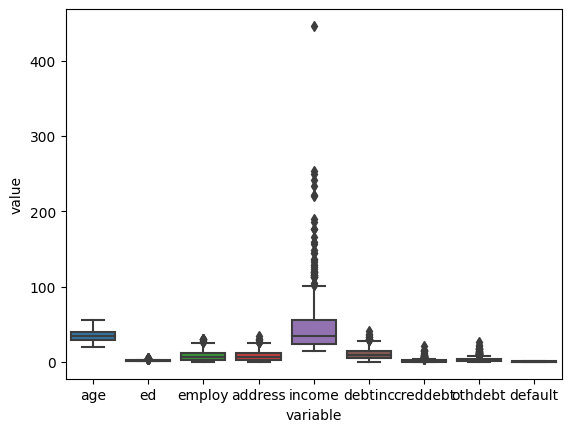

In [ ]:
#Menganalisa kondisi data kita, melihat outlier pada data
#Blockpot

sns.boxplot(x = 'variable', y = 'value', data = pd.melt(df))
plt.show()

variabel income memimiliki nilai yang cenderung tinggi daripada variabel lainnya. Karena INCOME itu adalah UANG

In [ ]:
df_a=df[['age','ed','employ','address','debtinc','creddebt','othdebt']]

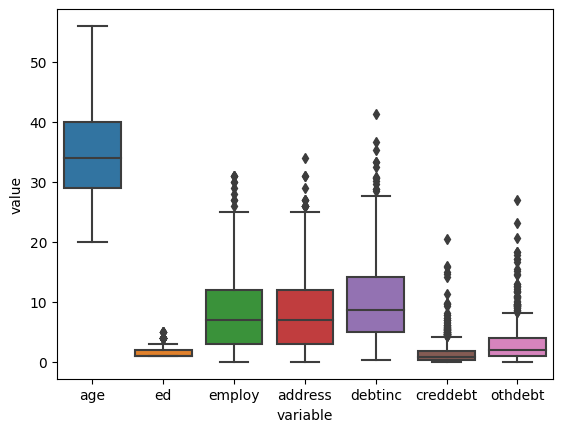

In [ ]:
sns.boxplot(x = 'variable', y = 'value', data = pd.melt(df_a))
plt.show()

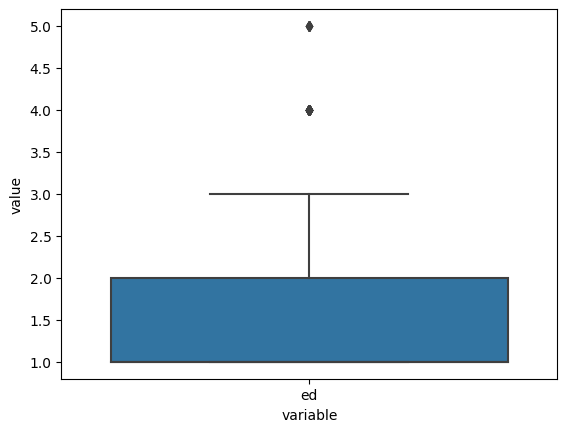

In [ ]:
df_b=df[['ed']]

sns.boxplot(x = 'variable', y = 'value', data = pd.melt(df_b))
plt.show()

1. calon nasabah kredit didominasi usia diatas 20
2. tingkat pendidikan calon nasabah ada 5 yaitu SD/SMP/SMA/S1/S2. Dimana tingkat pendidikan 1 dan 2 berada pada area bloxplot (sebarannya banyak), sedangkan ED 3 --> lebih sedikit. Makin sedikit level pendidikan maka makin besar peluang pengajuan kreditnya
3. Orang mengajukan kredit jika mereka saudah diatas 2 tahun tinggal ditempat yang sama,jabatan yang sama, rasio debtic dalam 2 tahun (nilainya sama)
4. Ada banyak calon nasabah kredit memiliki hutang lainnya

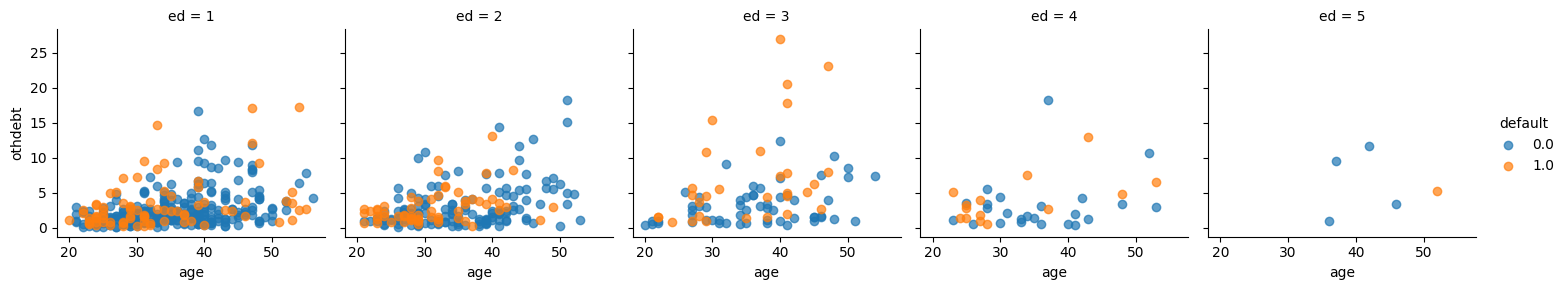

In [ ]:
scatplot = sns.FacetGrid(df_data_cr, col = 'ed', hue = 'default')
scatplot.map(plt.scatter, 'age','othdebt', alpha=.7)
scatplot.add_legend()

1. Potensi gagal bayar didominasi pada range usia 20 sd 30 pada level ED 1
2. Potensi gagal bayar didominasi pada range usia 20 sd 35 pada level ED 2
3. Potensi gagal bayar didominasi pada range usia 20 sd 45 pada level ED 3
4. Potensi gagal bayar didominasi pada range usia 20 sd 28 pada level ED 4
5. Potensi gagal bayar didominasi pada range usia diatas 50 pada level ED 5

## Data Preparation


NULL value NAN value

In [ ]:
df.isnull().sum()

age         0
ed          0
employ      0
address     0
income      0
debtinc     0
creddebt    0
othdebt     0
default     0
dtype: int64

In [ ]:
df.isna().sum()

age         0
ed          0
employ      0
address     0
income      0
debtinc     0
creddebt    0
othdebt     0
default     0
dtype: int64

## Pemodelan Data

In [ ]:
#SPLIT Training and Testing

from sklearn.model_selection import train_test_split # Import train_tes_split function
from sklearn import metrics #Import scikit-learn matrics module for accuracy calculation

In [ ]:
#Evaluation Model

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix

In [ ]:
#Input variabel
x=df[['age','ed','employ','address','income','debtinc','creddebt','othdebt']]

#Target Variabel
y=df['default'].astype('category')

In [ ]:
#SPLIT Testing & Training ======= Supervised Learning

x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.3, random_state=0)

Data Training 70% dan Testing 30%

## Pemodelan Menggunakan Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier #Import Decision Tree Classifier

In [ ]:
#Membuat object algoritma Decision Tree Klasifikasi
tree=DecisionTreeClassifier(criterion='gini',splitter='best',max_depth=6)

#Memodelkan data menggunakan algoritma decision tree
model_tree=tree.fit(x_train,y_train)

#Melakukan Predict pada data test
pred_tree=model_tree.predict(x_test)

## Evaluation Decision Tree Klasifikasi

In [ ]:
print(classification_report(y_test,pred_tree))

              precision    recall  f1-score   support

         0.0       0.83      0.80      0.81       155
         1.0       0.48      0.53      0.50        55

    accuracy                           0.73       210
   macro avg       0.66      0.66      0.66       210
weighted avg       0.74      0.73      0.73       210



Model Tidak Bisa dipergunakan

Text(113.9222222222222, 0.5, 'predicted label')

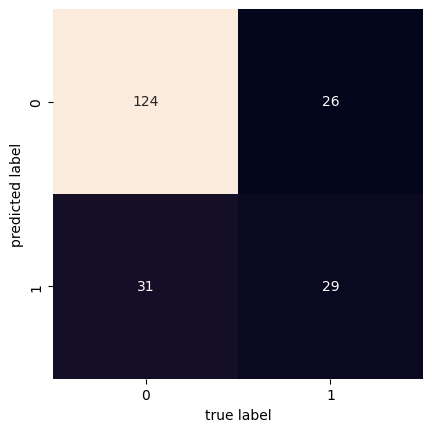

In [ ]:
# Visualize the confusion matrix of Decision Tree
mat = confusion_matrix (y_test, pred_tree)
sns.heatmap(mat.T, square = True, annot = True, fmt = 'd',cbar= False)
plt.xlabel('true label')
plt.ylabel('predicted label')

<Axes: >

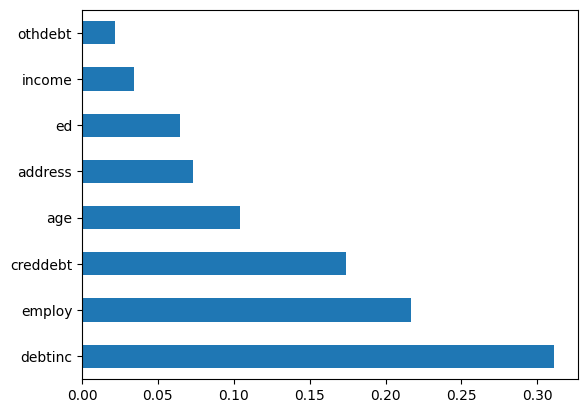

In [ ]:
#Signifikan factor dari model tersebut yang menggambarkan nasabah gagal bayar / tidak

feat_importances=pd.Series(model_tree.feature_importances_,index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')

## Pemodelan Menggunakan Random Forrest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [ ]:
#Membuat object algoritma Random Forest
clf_rf=RandomForestClassifier()

#Memodelkan data menggunakan algoritma Random Forest
model_rf=clf_rf.fit(x_train,y_train)

#Melakukan Predict pada data test
pred_rf=model_rf.predict(x_test)

## Evaluation Model Random Forest

In [ ]:
print(classification_report(y_test,pred_rf))

              precision    recall  f1-score   support

         0.0       0.81      0.95      0.88       155
         1.0       0.72      0.38      0.50        55

    accuracy                           0.80       210
   macro avg       0.77      0.67      0.69       210
weighted avg       0.79      0.80      0.78       210



Text(113.9222222222222, 0.5, 'predicted label')

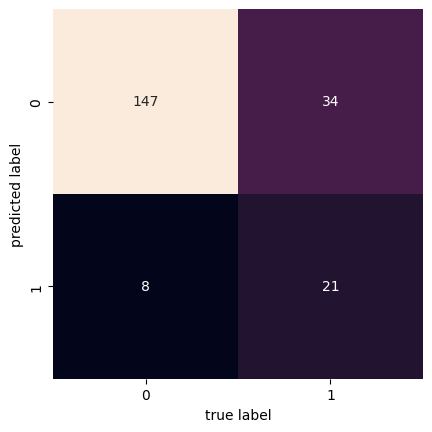

In [ ]:
# Visualize the confusion matrix of Random Forest
mat = confusion_matrix (y_test, pred_rf)
sns.heatmap(mat.T, square = True, annot = True, fmt = 'd',cbar= False)
plt.xlabel('true label')
plt.ylabel('predicted label')

<Axes: >

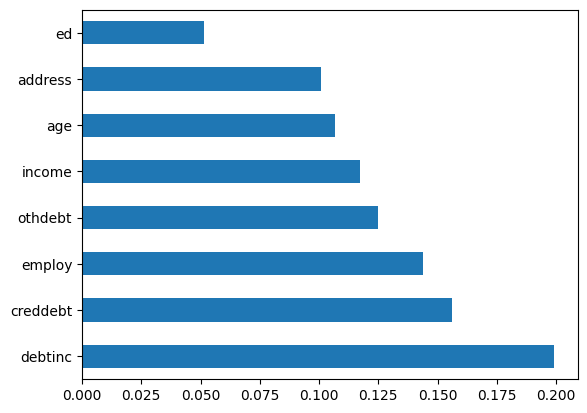

In [ ]:
#Signifikan factor Model Random Forset dari model tersebut yang menggambarkan nasabah gagal bayar / tidak

feat_importances=pd.Series(model_rf.feature_importances_,index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')

## Pemodelan Menggunakan XGBOOST Classifier

In [ ]:
from xgboost import XGBClassifier

In [ ]:
#Membuat object algoritma xgboost
clf_xg=RandomForestClassifier()

#Memodelkan data menggunakan algoritma xgboost
model_xg=clf_xg.fit(x_train,y_train)

#Melakukan Predict pada data test
pred_xg=model_xg.predict(x_test)

## Evaluasi Classification Report

In [ ]:
print(classification_report(y_test,pred_xg))

              precision    recall  f1-score   support

         0.0       0.81      0.92      0.86       155
         1.0       0.62      0.38      0.47        55

    accuracy                           0.78       210
   macro avg       0.71      0.65      0.66       210
weighted avg       0.76      0.78      0.76       210



Text(113.9222222222222, 0.5, 'predicted label')

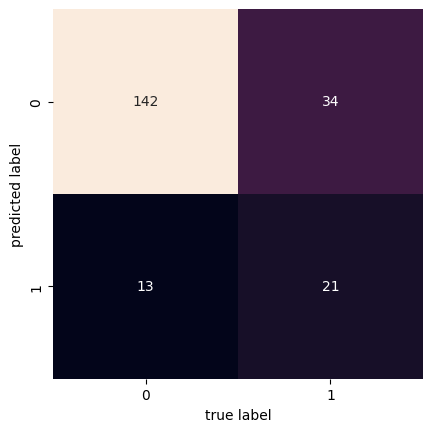

In [ ]:
# Visualize the confusion matrix of xgboost
mat = confusion_matrix (y_test, pred_xg)
sns.heatmap(mat.T, square = True, annot = True, fmt = 'd',cbar= False)
plt.xlabel('true label')
plt.ylabel('predicted label')

<Axes: >

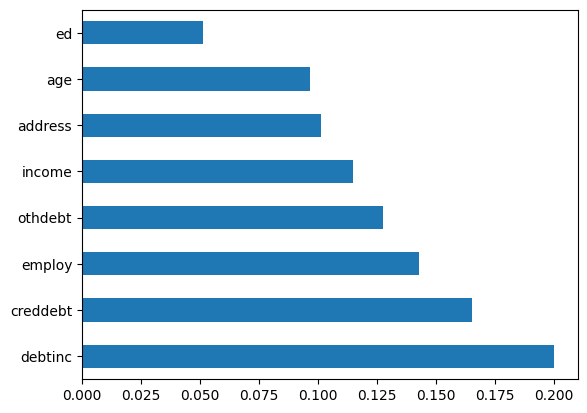

In [ ]:
#Signifikan factor Model XGBOOST dari model tersebut yang menggambarkan nasabah gagal bayar / tidak

feat_importances=pd.Series(model_xg.feature_importances_,index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')

## Pemodelan Menggunakan Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
#Membuat object algoritma Logistik Regression
clf_lg=LogisticRegression()

#Memodelkan data menggunakan algoritma Logistik Regression
model_lg=clf_lg.fit(x_train,y_train)

#Melakukan Predict pada data test
pred_lg=model_lg.predict(x_test)

## Evaluasi Pemodelan Logistik Regression

In [ ]:
print(classification_report(y_test,pred_lg))

              precision    recall  f1-score   support

         0.0       0.82      0.95      0.88       155
         1.0       0.73      0.40      0.52        55

    accuracy                           0.80       210
   macro avg       0.77      0.67      0.70       210
weighted avg       0.79      0.80      0.78       210



In [ ]:
# Visualize the confusion matrix of logistic Regression
mat = confusion_matrix (y_test, pred_lg)
sns.heatmap(mat.T, square = True, annot = True, fmt = 'd',cbar= False)
plt.xlabel('true label')
plt.ylabel('predicted label')

## Pemodelan Menggunakan SVM

In [ ]:
# Import SVM
from sklearn.svm import SVC

In [ ]:
#Membuat object algoritma SVM
clf_svm=SVC(kernel='linear', random_state=0)

#Memodelkan data menggunakan algoritma SVM
model_svm=clf_svm.fit(x_train,y_train)

#Melakukan Predict pada data test
pred_svm=model_svm.predict(x_test)

## Evaluasi Pemodelan SVM

In [ ]:
print(classification_report(y_test,pred_svm))

In [ ]:
# Visualize the confusion matrix of logistic Regression
mat = confusion_matrix (y_test, pred_svm)
sns.heatmap(mat.T, square = True, annot = True, fmt = 'd',cbar= False)
plt.xlabel('true label')
plt.ylabel('predicted label')

## Implementasi Model


Model terbaik menggunakan SVM dengan Akurasi 81% dan presisi 82%

In [ ]:
#Load Data Nasabah Baru/Calon nasabah yang mengajukan kredit

path1='//content/drive/MyDrive/DataSource/credit_risk_newCust.csv'

load_data1=pd.read_csv(path1, sep=',')

df_newnasabah=pd.DataFrame(load_data1)

In [ ]:
df_newnasabah.head()

In [ ]:
df_newnasabah.info()

In [ ]:
#Input variabel untuk predict

x2=df_newnasabah[['age','ed', 'employ', 'address', 'income', 'debtinc', 'creddebt', 'othdebt']]

In [ ]:
#Predict menggunakan model SVM


prediction_svm = model_svm.predict(x2)
prediction_svm

## Membuat Objek Baru Untuk Preparing Export Hasil Pemodelan Data Menggunakan Data Baru

In [ ]:
df_pred=pd.DataFrame({'prediction': prediction_svm})

df_pred.head()

In [ ]:
df4=x2

df4

In [ ]:
df_hasil_predict=pd.concat([df4,df_pred],sort=True, axis=1)

df_hasil_predict

In [ ]:
df_hasil_predict['prediction'].value_counts()

Dari hasil tersebut, maka bank akan memutuskan ada sebanyak 127 calon nasabah yang diterima permohonan kreditnya. dan ada 23 calon nasabah yang di tolak permohonan kreditnya

In [ ]:
#Eksport To CSV
#Eksport as download if in colab
from google.colab import files

#menyimpan file / eksport file in local computer to CSV file

df_hasil_predict.to_csv('df_hasil_predict.csv',sep=',')
files.download('df_hasil_predict.csv')

## Implementasi Predictive analytic untuk optimalisasi nilai kredit OLD nasabah pada bank XX

Case: Estimasi

Kemungkinan Algoritma yang digunakan:
1. Linear Regression
2. ANN (Artificial Neural Network)

Bagaimana menangani pemohon ynag sudah ada, termasuk apakah akan meningkatkan credit mereka..

In [ ]:
df.info()

In [ ]:
df.head()

## Naasabah menunjukkan bahwa presentase rasio hutang terhadap kredit yang baik dibawah 30%

kondisi kedua jika mau menaikkan limit kredit maka merefer nasabah2 yang belum pernah gagal bayar

In [ ]:
df_1=df[(df['creddebt']<=0.3)&(df['default']<=0.3)]

df_1.head()

In [ ]:
df_1.info()

Dari hasil filterisasi data, maka didapatkan ada 115 OLD nasabah yang akan diberikan kenaikan limit kredit

pada case estimasi ini biasanya terkait dengan analisis korelasi.

kita bisa menggunakan analisis korelasi untuk melihat hubungan linieritas,sehingga bisa memutuskan variabel yang mana akan dijadikan signifikan vaktor(indikator pemodelan / input variabel)

Tetapi jika tidak menunjukkan adanya linieritas dalam data,maka bisa dipergunakkan algoritma yang mendukung pengolahan data non linier.

In [ ]:
f, ax=plt.subplots(figsize=(20,30))
plt.title('Person Correlation')
sns.heatmap(df.astype(float).corr(), linewidth=0.25, vmax=1.0, square=True, cmap='YlGn', linecolor='black', annot=True)

## Hasi Analisa:

1. Ditemukan multicolinieritas
2. variabel independen memiliki hubungan yang kuat dengan variabel independen lainnya (antara variabel independen memiliki hubungan)
3. Jika kondisi demikian bisa disolusikan dengan algoritma multivariat : ANN, XGBOOST,
4. Hasil kolerasai menunjukkan tidak ada linieritas dalam data terkait variabel independen dan dependen.

## Pemodelan Data

In [ ]:
#Input variabel
x1=df[['age','ed','employ','address','income','creddebt','othdebt', 'default']]

#Target Variabel
y1=df['debtinc']

In [ ]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1, test_size=0.3, random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression

#Untuk Evaluasi Model
from sklearn import metrics

In [ ]:
#Membuat object algoritma Logistik Regression
ln=LinearRegression()

#Memodelkan data menggunakan algoritma Logistik Regression
model_ln=ln.fit(x1_train,y1_train)

#Melakukan Predict pada data test
pred_ln=model_ln.predict(x1_test)

In [ ]:
#Assesing  Goodness-off-fit in a regression model
print('r2_score:', metrics.r2_score(y1_test, pred_ln).round(3))

In [ ]:
import numpy as np

def mean_absolut_percentage_error(y_true,y_pred):
  y_true,y_pred=np.array(y_true),np.array(y_pred)
  return np.mean(np.abs((y_true-y_pred)/y_true))*100

print('MAPE ;',mean_absolut_percentage_error(y1_test,pred_ln).round(3))

## Pemodelan Menggunakan XGBOOST Classifier

In [ ]:
from xgboost import XGBRegressor

In [ ]:
xgr=XGBRegressor(n_estimators=100, max_depth=3, random_state=0, learning_rate=0.3)

#Hidden_layer_size=(2,2), activations='relu', max_liter='100'

#Memodelkan data menggunakan algoritma Logistik Regression
model_xgr=xgr.fit(x1_train,y1_train)

#Melakukan Predict pada data test
pred_xgr=model_xgr.predict(x1_test)

In [ ]:
#Assesing  Goodness-off-fit in a regression model
print('r2_score:', metrics.r2_score(y1_test, pred_xgr).round(3))

In [ ]:
#Membuat Script MAPE

def mean_absolut_percentage_error(y_true,y_pred):
  y_true,y_pred=np.array(y_true),np.array(y_pred)
  return np.mean(np.abs((y_true-y_pred)/y_true))*100

print('MAPE ;',mean_absolut_percentage_error(y1_test,pred_xgr).round(3))

## Implementasi model XGBOOST Regressor pada data nasabah lama (OLD Nasabah)

Step1

Create data OLD Nasabah yang akan dipredict

Step2

Memodelkan data / membuat data predict

Step3

Filtering pada hasil predict data OLD Nasabah yang creddebt dibawah 30% dan tidak pernah gagal bayar, dan itulah yang di realisasikan nilai kredit

In [ ]:
#Data Old Nasabah
df.info()

In [ ]:
x_2=df[['age','ed','employ','address','income','creddebt','othdebt', 'default']]

In [ ]:
prediction_xgr=model_xgr.predict(x_2)

prediction_xgr

In [ ]:
df_prediction_xgr=pd.DataFrame({'prediction': prediction_xgr}).round(2)

df_prediction_xgr

In [ ]:
#Satukan dataframe input dengan predict

df_pred_debtinc=pd.concat([df,df_prediction_xgr], sort=True, axis=1)

df_pred_debtinc

## Menentukan nasabah yang di approve kenaikan limit kredit

In [ ]:
df_approve_limit=df_pred_debtinc[(df_pred_debtinc['creddebt']<=0.3)&(df['default']<=0.3)]

df_approve_limit

In [ ]:
#Eksport To CSV
#Eksport as download if in colab
from google.colab import files

#menyimpan file / eksport file in local computer to CSV file

df_approve_limit.to_excel('df_approve_limit.xlsx')
files.download('df_approve_limit.xlsx')